In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import seaborn as sns
from shapely.ops import unary_union
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use("ggplot")
from sklearn.decomposition import PCA
from sklearn import decomposition
from scipy import stats
from scipy.stats import zscore

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.preprocessing import RobustScaler


import os



# Read csv

In [4]:
gen_degree = pd.read_csv("data/overlap_gen_degree_PCA.csv")
origin_data_census = pd.read_csv("data/identified_neiborhood_data_2011_2021.csv")
LSOA2021_code = pd.read_csv("data/LSOA2021_London_code.csv")
park_data = pd.read_csv("data/link_lsoa2021_park.csv")
original_identified_neiborhood_data_2011_2021 = pd.read_csv("data/classifed_neibor_change.csv")
perpared_for_regression_standardized = pd.read_csv("data/perpared_for_regression.csv")
airbnb_data = pd.read_csv("data/airbnb_LSOA2021.csv")
poi_data = pd.read_csv("data/link_poi_data.csv")

In [5]:
perpared_for_regression_standardized

,LSOA21CD,housing_price_change_pct,housing_mediam_price_change_pct,young_people_change_pct,middle_aged_people_change_pct,more_65_people_change_pct,older_middle_aged_people_change_pct,household_more_65_change_pct,household_no_children_change_pct,household_dependent_children_change_pct,...,Full_time_31_to_48_hours_change_pct,Full_time_49_or_more_hours_change_pct,average_density_change_pct,New_build_2011_2018_pct,Conversion_2011_2018_pct,average_chn_11_19,income_score_change,park_area,park_density,to_park_in_300m
0,E01000001,0.663366,0.669865,1.81,0.01,6.83,-9.48,5.57,2.02,1.64,...,4.410000,-8.180000,0.355900,0.000000,0.005497,0.140000,-0.0040,3.934120e+04,29.412003,1
1,E01000002,0.549763,0.503733,4.44,2.50,1.28,-4.75,-0.22,-0.55,-3.92,...,0.420000,0.190000,-3.392251,0.067093,0.165370,0.130000,0.0220,6.628189e+04,29.370635,1
2,E01000003,0.270140,0.026986,0.23,0.10,-1.20,5.70,-4.23,5.94,-1.25,...,0.310000,-2.590000,19.830131,0.000000,0.135594,0.150000,-0.0190,3.524176e+04,61.516391,1
3,E01000005,NaN,NaN,0.87,-0.85,-3.44,3.55,-3.45,1.47,0.29,...,3.870000,-6.720000,11.814899,0.000000,0.052222,0.130000,-0.0060,0.000000e+00,0.000000,0
4,E01000006,0.704782,0.826443,-0.84,-6.56,0.77,5.79,1.10,-4.75,0.91,...,-2.860000,-2.420000,8.338497,0.000034,0.000000,0.260000,-0.0160,0.000000e+00,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4989,E01035718,0.728142,0.735924,-0.30,-4.44,1.11,2.21,3.97,-1.23,6.08,...,-28.370000,-55.120000,-93.638873,0.000439,0.019240,0.250000,-0.0005,2.222580e+06,83.147099,1
4990,E01035719,0.309091,0.161800,3.00,-2.16,-2.27,0.33,-2.72,-2.77,3.04,...,30.534529,10.321612,34.591100,0.094227,0.001832,0.071530,-0.0280,0.000000e+00,0.000000,1
4991,E01035720,0.309091,0.161800,3.75,-6.00,-3.45,4.47,-1.90,-4.33,2.20,...,25.794047,2.997499,7.603197,0.015255,0.000458,0.085672,-0.0280,0.000000e+00,0.000000,1
4992,E01035721,3.809873,5.511286,-1.26,-3.16,-2.36,6.85,-4.67,-3.02,-0.86,...,-53.370000,-22.090000,-10.318013,0.091797,0.017407,0.280000,-0.0130,0.000000e+00,0.000000,1


In [6]:
original_identified_neiborhood_data_2011_2021["housing_price_change_pct"]

0       0.663366
1       0.549763
2       0.270140
3            NaN
4       0.704782
          ...   
4989    0.728142
4990    0.309091
4991    0.309091
4992    3.809873
4993    1.100000
Name: housing_price_change_pct, Length: 4994, dtype: float64

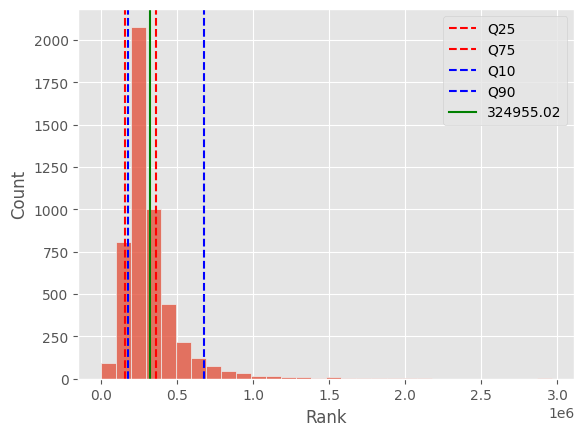

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# calculate the quantiles
q25 = original_identified_neiborhood_data_2011_2021["mediam_price_2011"].quantile(0.05)
q75 = original_identified_neiborhood_data_2011_2021["mediam_price_2011"].quantile(0.75)
q10 = original_identified_neiborhood_data_2011_2021["mediam_price_2011"].quantile(0.10)
q90 = original_identified_neiborhood_data_2011_2021["mediam_price_2011"].quantile(0.95)

# create the histogram
sns.histplot(original_identified_neiborhood_data_2011_2021["mediam_price_2011"], bins=30, kde=False)

# draw the lines for quantiles
plt.axvline(q25, color='red', linestyle='--', label='Q25')
plt.axvline(q75, color='red', linestyle='--', label='Q75')
plt.axvline(q10, color='blue', linestyle='--', label='Q10')
plt.axvline(q90, color='blue', linestyle='--', label='Q90')

# draw the line for the specified value
plt.axvline(324955.01755070203, color='green', linestyle='-', label='324955.02')

# add legend and labels
plt.legend()
plt.xlabel('Rank')
plt.ylabel('Count')

# display the plot
plt.show()

In [8]:
original_identified_neiborhood_data_2011_2021["mediam_price_2011"].mean()

322824.82609130954

In [9]:
original_identified_neiborhood_data_2011_2021["mediam_price_2011"].quantile(0.05)

155000.0

In [10]:
original_identified_neiborhood_data_2011_2021["mediam_price_2011"].quantile(0.25)

215000.0

In [11]:
from scipy.stats import zscore

In [12]:
original_identified_neiborhood_data_2011_2021["more_low_price"] = (original_identified_neiborhood_data_2011_2021["mediam_price_2011"] < 215000).astype(int)
original_identified_neiborhood_data_2011_2021["low_price"] = (original_identified_neiborhood_data_2011_2021["mediam_price_2011"] < 155000).astype(int)
original_identified_neiborhood_data_2011_2021["low_than_mediam_price"] = (original_identified_neiborhood_data_2011_2021["mediam_price_2011"] < 323386).astype(int)

In [13]:
original_identified_neiborhood_data_2011_2021["more_low_price_z"] = zscore(original_identified_neiborhood_data_2011_2021["more_low_price"])
original_identified_neiborhood_data_2011_2021["low_price_z"] = zscore(original_identified_neiborhood_data_2011_2021["low_price"])

In [14]:
original_identified_neiborhood_data_2011_2021["born_in_uk_change_pct"] = original_identified_neiborhood_data_2011_2021["born_in_the_UK_2021_pct"] - original_identified_neiborhood_data_2011_2021["born_in_the_UK_2011_pct"]

In [15]:
airbnb_data.head()

,LSOA21CD,num_airbnb_12_21,density_airbnb,num_airbnb_rank,airbnb_total_price_2012_2021,num_airbnb_2012_2021,average_price_2012_2021
0,E01000001,11,0.008224,59.462389,1427,11,129.727273
1,E01000002,12,0.005317,62.020377,1740,12,145.000000
2,E01000003,14,0.024438,66.442662,1228,14,87.714286
3,E01000005,79,0.041468,98.428355,11491,79,145.455696
4,E01000006,6,0.004161,42.022545,363,6,60.500000


In [16]:
airbnb_data["density_airbnb"].median()

0.002917118

# Calculate data

In [17]:
perpared_for_regression_standardized = pd.merge(perpared_for_regression_standardized, gen_degree, on = "LSOA21CD", how = "inner")

In [19]:
perpared_for_regression_standardized["more_low_price"] = original_identified_neiborhood_data_2011_2021["more_low_price"]
perpared_for_regression_standardized["low_price"] = original_identified_neiborhood_data_2011_2021["low_price"]
perpared_for_regression_standardized["low_than_mediam_price"] = original_identified_neiborhood_data_2011_2021["low_than_mediam_price"]
perpared_for_regression_standardized["born_in_uk_change_pct"] = original_identified_neiborhood_data_2011_2021["born_in_uk_change_pct"]
perpared_for_regression_standardized["religionNo_religion_change_pct"] = original_identified_neiborhood_data_2011_2021["religionNo_religion_2021_pct"] - original_identified_neiborhood_data_2011_2021["religionNo_religion_2011_pct"]


In [20]:
perpared_for_regression_standardized

,LSOA21CD,housing_price_change_pct,housing_mediam_price_change_pct,young_people_change_pct,middle_aged_people_change_pct,more_65_people_change_pct,older_middle_aged_people_change_pct,household_more_65_change_pct,household_no_children_change_pct,household_dependent_children_change_pct,...,scenario1_PCA2,scenario1_PCA3,scenario1_PCA_total,scenario1_PCA_total_zscore,scenario1_status,s1_pca,more_low_price,low_price,low_than_mediam_price,born_in_uk_change_pct
0,E01000001,0.663366,0.669865,1.81,0.01,6.83,-9.48,5.57,2.02,1.64,...,-0.015822,0.008355,0.002112,0.014282,status,0.009580,0,0,0,-7.97
1,E01000002,0.549763,0.503733,4.44,2.50,1.28,-4.75,-0.22,-0.55,-3.92,...,0.101743,0.088313,0.195916,1.324640,ascent,0.005859,0,0,0,-18.14
2,E01000003,0.270140,0.026986,0.23,0.10,-1.20,5.70,-4.23,5.94,-1.25,...,0.077675,0.032563,0.240533,1.626312,ascent,0.130296,0,0,0,-10.25
3,E01000005,NaN,NaN,0.87,-0.85,-3.44,3.55,-3.45,1.47,0.29,...,0.066680,0.097895,0.053255,0.360073,descent,0.360073,1,1,1,-9.57
4,E01000006,0.704782,0.826443,-0.84,-6.56,0.77,5.79,1.10,-4.75,0.91,...,-0.146486,0.014231,-0.198699,-1.343456,descent,-1.343456,0,0,1,-0.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4989,E01035718,0.728142,0.735924,-0.30,-4.44,1.11,2.21,3.97,-1.23,6.08,...,-0.021089,0.035125,0.086124,0.582305,ascent,0.072088,0,0,0,-1.17
4990,E01035719,0.309091,0.161800,3.00,-2.16,-2.27,0.33,-2.72,-2.77,3.04,...,0.108214,-0.044918,0.043343,0.293051,status,-0.019953,0,0,0,-16.53
4991,E01035720,0.309091,0.161800,3.75,-6.00,-3.45,4.47,-1.90,-4.33,2.20,...,-0.038635,-0.087813,-0.284142,-1.921162,descent,-1.921162,0,0,0,-6.20
4992,E01035721,3.809873,5.511286,-1.26,-3.16,-2.36,6.85,-4.67,-3.02,-0.86,...,0.134161,0.134214,0.290361,1.963212,ascent,0.021986,0,0,0,-5.92


In [21]:
original_data = perpared_for_regression_standardized.copy()

In [22]:
original_data = original_data.merge(LSOA2021_code, left_on="LSOA21CD", right_on="LSOA21CD", how="inner")
poi_data =poi_data.merge(LSOA2021_code, left_on="LSOA21CD", right_on="LSOA21CD", how="inner")
airbnb_data = airbnb_data.merge(LSOA2021_code, left_on="LSOA21CD", right_on="LSOA21CD", how="inner")

In [23]:
original_data["airbnb_average_price"] = zscore(airbnb_data["average_price_2012_2021"])
original_data["density_airbnb"] = airbnb_data["density_airbnb"]

In [24]:
original_data = original_data.merge(poi_data, on = "LSOA21CD", how = "left")
original_data = original_data.fillna(0)


In [25]:
original_data

,LSOA21CD,housing_price_change_pct,housing_mediam_price_change_pct,young_people_change_pct,middle_aged_people_change_pct,more_65_people_change_pct,older_middle_aged_people_change_pct,household_more_65_change_pct,household_no_children_change_pct,household_dependent_children_change_pct,...,scenario1_status,s1_pca,more_low_price,low_price,low_than_mediam_price,born_in_uk_change_pct,airbnb_average_price,density_airbnb,cafe_other_pct,school_pct
0,E01000001,0.663366,0.669865,1.81,0.01,6.83,-9.48,5.57,2.02,1.64,...,status,0.009580,0,0,0,-7.97,0.329179,0.008224,0.016634,0.015137
1,E01000002,0.549763,0.503733,4.44,2.50,1.28,-4.75,-0.22,-0.55,-3.92,...,ascent,0.005859,0,0,0,-18.14,0.466385,0.005317,0.010659,0.000000
2,E01000003,0.270140,0.026986,0.23,0.10,-1.20,5.70,-4.23,5.94,-1.25,...,ascent,0.130296,0,0,0,-10.25,-0.048254,0.024438,0.010003,0.060850
3,E01000005,0.000000,0.000000,0.87,-0.85,-3.44,3.55,-3.45,1.47,0.29,...,descent,0.360073,1,1,1,-9.57,0.470479,0.041468,0.002481,0.018249
4,E01000006,0.704782,0.826443,-0.84,-6.56,0.77,5.79,1.10,-4.75,0.91,...,descent,-1.343456,0,0,1,-0.47,-0.292739,0.004161,0.000000,0.037239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4989,E01035718,0.728142,0.735924,-0.30,-4.44,1.11,2.21,3.97,-1.23,6.08,...,ascent,0.072088,0,0,0,-1.17,2.543400,0.006435,0.004217,0.000000
4990,E01035719,0.309091,0.161800,3.00,-2.16,-2.27,0.33,-2.72,-2.77,3.04,...,status,-0.019953,0,0,0,-16.53,0.411584,0.011031,0.000000,0.000000
4991,E01035720,0.309091,0.161800,3.75,-6.00,-3.45,4.47,-1.90,-4.33,2.20,...,descent,-1.921162,0,0,0,-6.20,0.787179,0.022104,0.000000,0.001214
4992,E01035721,3.809873,5.511286,-1.26,-3.16,-2.36,6.85,-4.67,-3.02,-0.86,...,ascent,0.021986,0,0,0,-5.92,1.361695,0.020214,0.000261,0.002878


In [26]:
def data_merge(data, data2):
    data = data.merge(data2, on="LSOA21CD")
    return data

In [27]:
binary_data = original_data.copy()

In [28]:

binary_data['park_binary'] = original_data['park_density'].apply(lambda x: 1 if x > 0.4927646145 else 0)
binary_data['airbnb_binary'] = airbnb_data['density_airbnb'].apply(lambda x: 1 if x > 0.002917118 else 0)
binary_data 


,LSOA21CD,housing_price_change_pct,housing_mediam_price_change_pct,young_people_change_pct,middle_aged_people_change_pct,more_65_people_change_pct,older_middle_aged_people_change_pct,household_more_65_change_pct,household_no_children_change_pct,household_dependent_children_change_pct,...,more_low_price,low_price,low_than_mediam_price,born_in_uk_change_pct,airbnb_average_price,density_airbnb,cafe_other_pct,school_pct,park_binary,airbnb_binary
0,E01000001,0.663366,0.669865,1.81,0.01,6.83,-9.48,5.57,2.02,1.64,...,0,0,0,-7.97,0.329179,0.008224,0.016634,0.015137,1,1
1,E01000002,0.549763,0.503733,4.44,2.50,1.28,-4.75,-0.22,-0.55,-3.92,...,0,0,0,-18.14,0.466385,0.005317,0.010659,0.000000,1,1
2,E01000003,0.270140,0.026986,0.23,0.10,-1.20,5.70,-4.23,5.94,-1.25,...,0,0,0,-10.25,-0.048254,0.024438,0.010003,0.060850,1,1
3,E01000005,0.000000,0.000000,0.87,-0.85,-3.44,3.55,-3.45,1.47,0.29,...,1,1,1,-9.57,0.470479,0.041468,0.002481,0.018249,0,1
4,E01000006,0.704782,0.826443,-0.84,-6.56,0.77,5.79,1.10,-4.75,0.91,...,0,0,1,-0.47,-0.292739,0.004161,0.000000,0.037239,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4989,E01035718,0.728142,0.735924,-0.30,-4.44,1.11,2.21,3.97,-1.23,6.08,...,0,0,0,-1.17,2.543400,0.006435,0.004217,0.000000,1,1
4990,E01035719,0.309091,0.161800,3.00,-2.16,-2.27,0.33,-2.72,-2.77,3.04,...,0,0,0,-16.53,0.411584,0.011031,0.000000,0.000000,0,1
4991,E01035720,0.309091,0.161800,3.75,-6.00,-3.45,4.47,-1.90,-4.33,2.20,...,0,0,0,-6.20,0.787179,0.022104,0.000000,0.001214,0,1
4992,E01035721,3.809873,5.511286,-1.26,-3.16,-2.36,6.85,-4.67,-3.02,-0.86,...,0,0,0,-5.92,1.361695,0.020214,0.000261,0.002878,0,1


In [29]:
nor_data_psm = data_merge(original_data, LSOA2021_code).fillna(0)

In [30]:

nor_data_psm["park_binary"] = binary_data["park_binary"]

In [31]:

nor_data_psm['airbnb_binary'] = binary_data['airbnb_binary']
nor_data_psm["compared_mean_price_2011"] = origin_data_census["compared_mean_price_2011"]
nor_data_psm["compared_mean_price_2021"] = origin_data_census["compared_mean_price_2021"]
nor_data_psm["mediam_price_2011"] = original_identified_neiborhood_data_2011_2021["mediam_price_2011"]
nor_data_psm["mediam_price_2021"] = original_identified_neiborhood_data_2011_2021["mediam_price_2021"]
nor_data_psm["Income_Score_rate_2015"] = original_identified_neiborhood_data_2011_2021["Income_Score_rate_2015"]
nor_data_psm["housing_mediam_price_2011"] = original_identified_neiborhood_data_2011_2021["mediam_price_2011"]
nor_data_psm["Driving_a_car_or_van_change_pct"] = original_identified_neiborhood_data_2011_2021["Driving_a_car_or_van_2021_pct"] - original_identified_neiborhood_data_2011_2021["Driving_a_car_or_van_2011_pct"]

In [32]:
nor_data_psm["going_to_work_by_van_change_pct"] = nor_data_psm["Driving_a_car_or_van_change_pct"] + nor_data_psm["Passenger_in_a_car_or_van_change_pct"]

In [33]:
nor_data_psm["average_chn_11_19"] =  nor_data_psm["average_chn_11_19"]  * 100

In [34]:
nor_data_psm

,LSOA21CD,housing_price_change_pct,housing_mediam_price_change_pct,young_people_change_pct,middle_aged_people_change_pct,more_65_people_change_pct,older_middle_aged_people_change_pct,household_more_65_change_pct,household_no_children_change_pct,household_dependent_children_change_pct,...,park_binary,airbnb_binary,compared_mean_price_2011,compared_mean_price_2021,mediam_price_2011,mediam_price_2021,Income_Score_rate_2015,housing_mediam_price_2011,Driving_a_car_or_van_change_pct,going_to_work_by_van_change_pct
0,E01000001,0.663366,0.669865,1.81,0.01,6.83,-9.48,5.57,2.02,1.64,...,1,1,339092.0,566238,505000.0,840000,0.0110,505000.0,-0.62,-0.89
1,E01000002,0.549763,0.503733,4.44,2.50,1.28,-4.75,-0.22,-0.55,-3.92,...,1,1,361592.0,543738,527500.0,817500,0.0120,527500.0,-0.30,-0.15
2,E01000003,0.270140,0.026986,0.23,0.10,-1.20,5.70,-4.23,5.94,-1.25,...,1,1,259242.0,266238,425150.0,540000,0.1050,425150.0,-0.66,-0.30
3,E01000005,0.000000,0.000000,0.87,-0.85,-3.44,3.55,-3.45,1.47,0.29,...,0,1,0.0,0,0.0,0,0.2170,0.0,0.46,0.35
4,E01000006,0.704782,0.826443,-0.84,-6.56,0.77,5.79,1.10,-4.75,0.91,...,0,1,74592.0,136238,240500.0,410000,0.1330,240500.0,-0.72,-0.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4989,E01035718,0.728142,0.735924,-0.30,-4.44,1.11,2.21,3.97,-1.23,6.08,...,1,1,1664092.0,2888738,1830000.0,3162500,0.0080,1830000.0,-1.86,-2.19
4990,E01035719,0.309091,0.161800,3.00,-2.16,-2.27,0.33,-2.72,-2.77,3.04,...,0,1,384092.0,446238,550000.0,720000,0.1240,550000.0,-2.38,-2.07
4991,E01035720,0.309091,0.161800,3.75,-6.00,-3.45,4.47,-1.90,-4.33,2.20,...,0,1,384092.0,446238,550000.0,720000,0.1240,550000.0,-0.96,-1.04
4992,E01035721,3.809873,5.511286,-1.26,-3.16,-2.36,6.85,-4.67,-3.02,-0.86,...,0,1,308117.0,2006238,474025.0,2280000,0.2010,474025.0,-2.27,-2.55


In [35]:
print(len(nor_data_psm))

4994


In [36]:
nor_data_psm["NSSES_1_and_2_change_pct"] = nor_data_psm["NSSES_1_change_pct"] + nor_data_psm["NSSES_2_change_pct"]
nor_data_psm["NSSES_3_change_pct"] = nor_data_psm["NSSES_3_change_pct"]
nor_data_psm["NSSES_4_5_6_change_pct"] = nor_data_psm["NSSES_4_change_pct"] + nor_data_psm["NSSES_5_change_pct"] + nor_data_psm["NSSES_6_change_pct"]
nor_data_psm["NSSES_7_change_pct"] = nor_data_psm["NSSES_7_change_pct"]
nor_data_psm["NSSES_8_change_pct"] = nor_data_psm["NSSES_8_change_pct"]
nor_data_psm["compared_housing_price_change"] = nor_data_psm["compared_mean_price_2021"] - nor_data_psm["compared_mean_price_2011"]
nor_data_psm["housing_price_pct"] = (nor_data_psm["mediam_price_2011"] - nor_data_psm["mediam_price_2021"]) / nor_data_psm["mediam_price_2011"] * 100
nor_data_psm = nor_data_psm.fillna(0)

# regression

In [38]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [39]:
regression_columns = ["park_density","density_airbnb","NSSES_1_and_2_change_pct",\
                     'NSSES_3_change_pct', "NSSES_4_change_pct","NSSES_5_change_pct","NSSES_6_change_pct",'NSSES_7_change_pct',\
                    "converted_or_share_house_change_pct","average_chn_11_19","Resident_in_UK_4_and_Less_change_pct",\
                    "1_car_or_van_in_household_change_pct","2_cars_or_vans_in_household_change_pct",'income_score_change',\
                    "compared_mean_price_2011"]

In [43]:
data_for_plot = nor_data_psm[regression_columns]

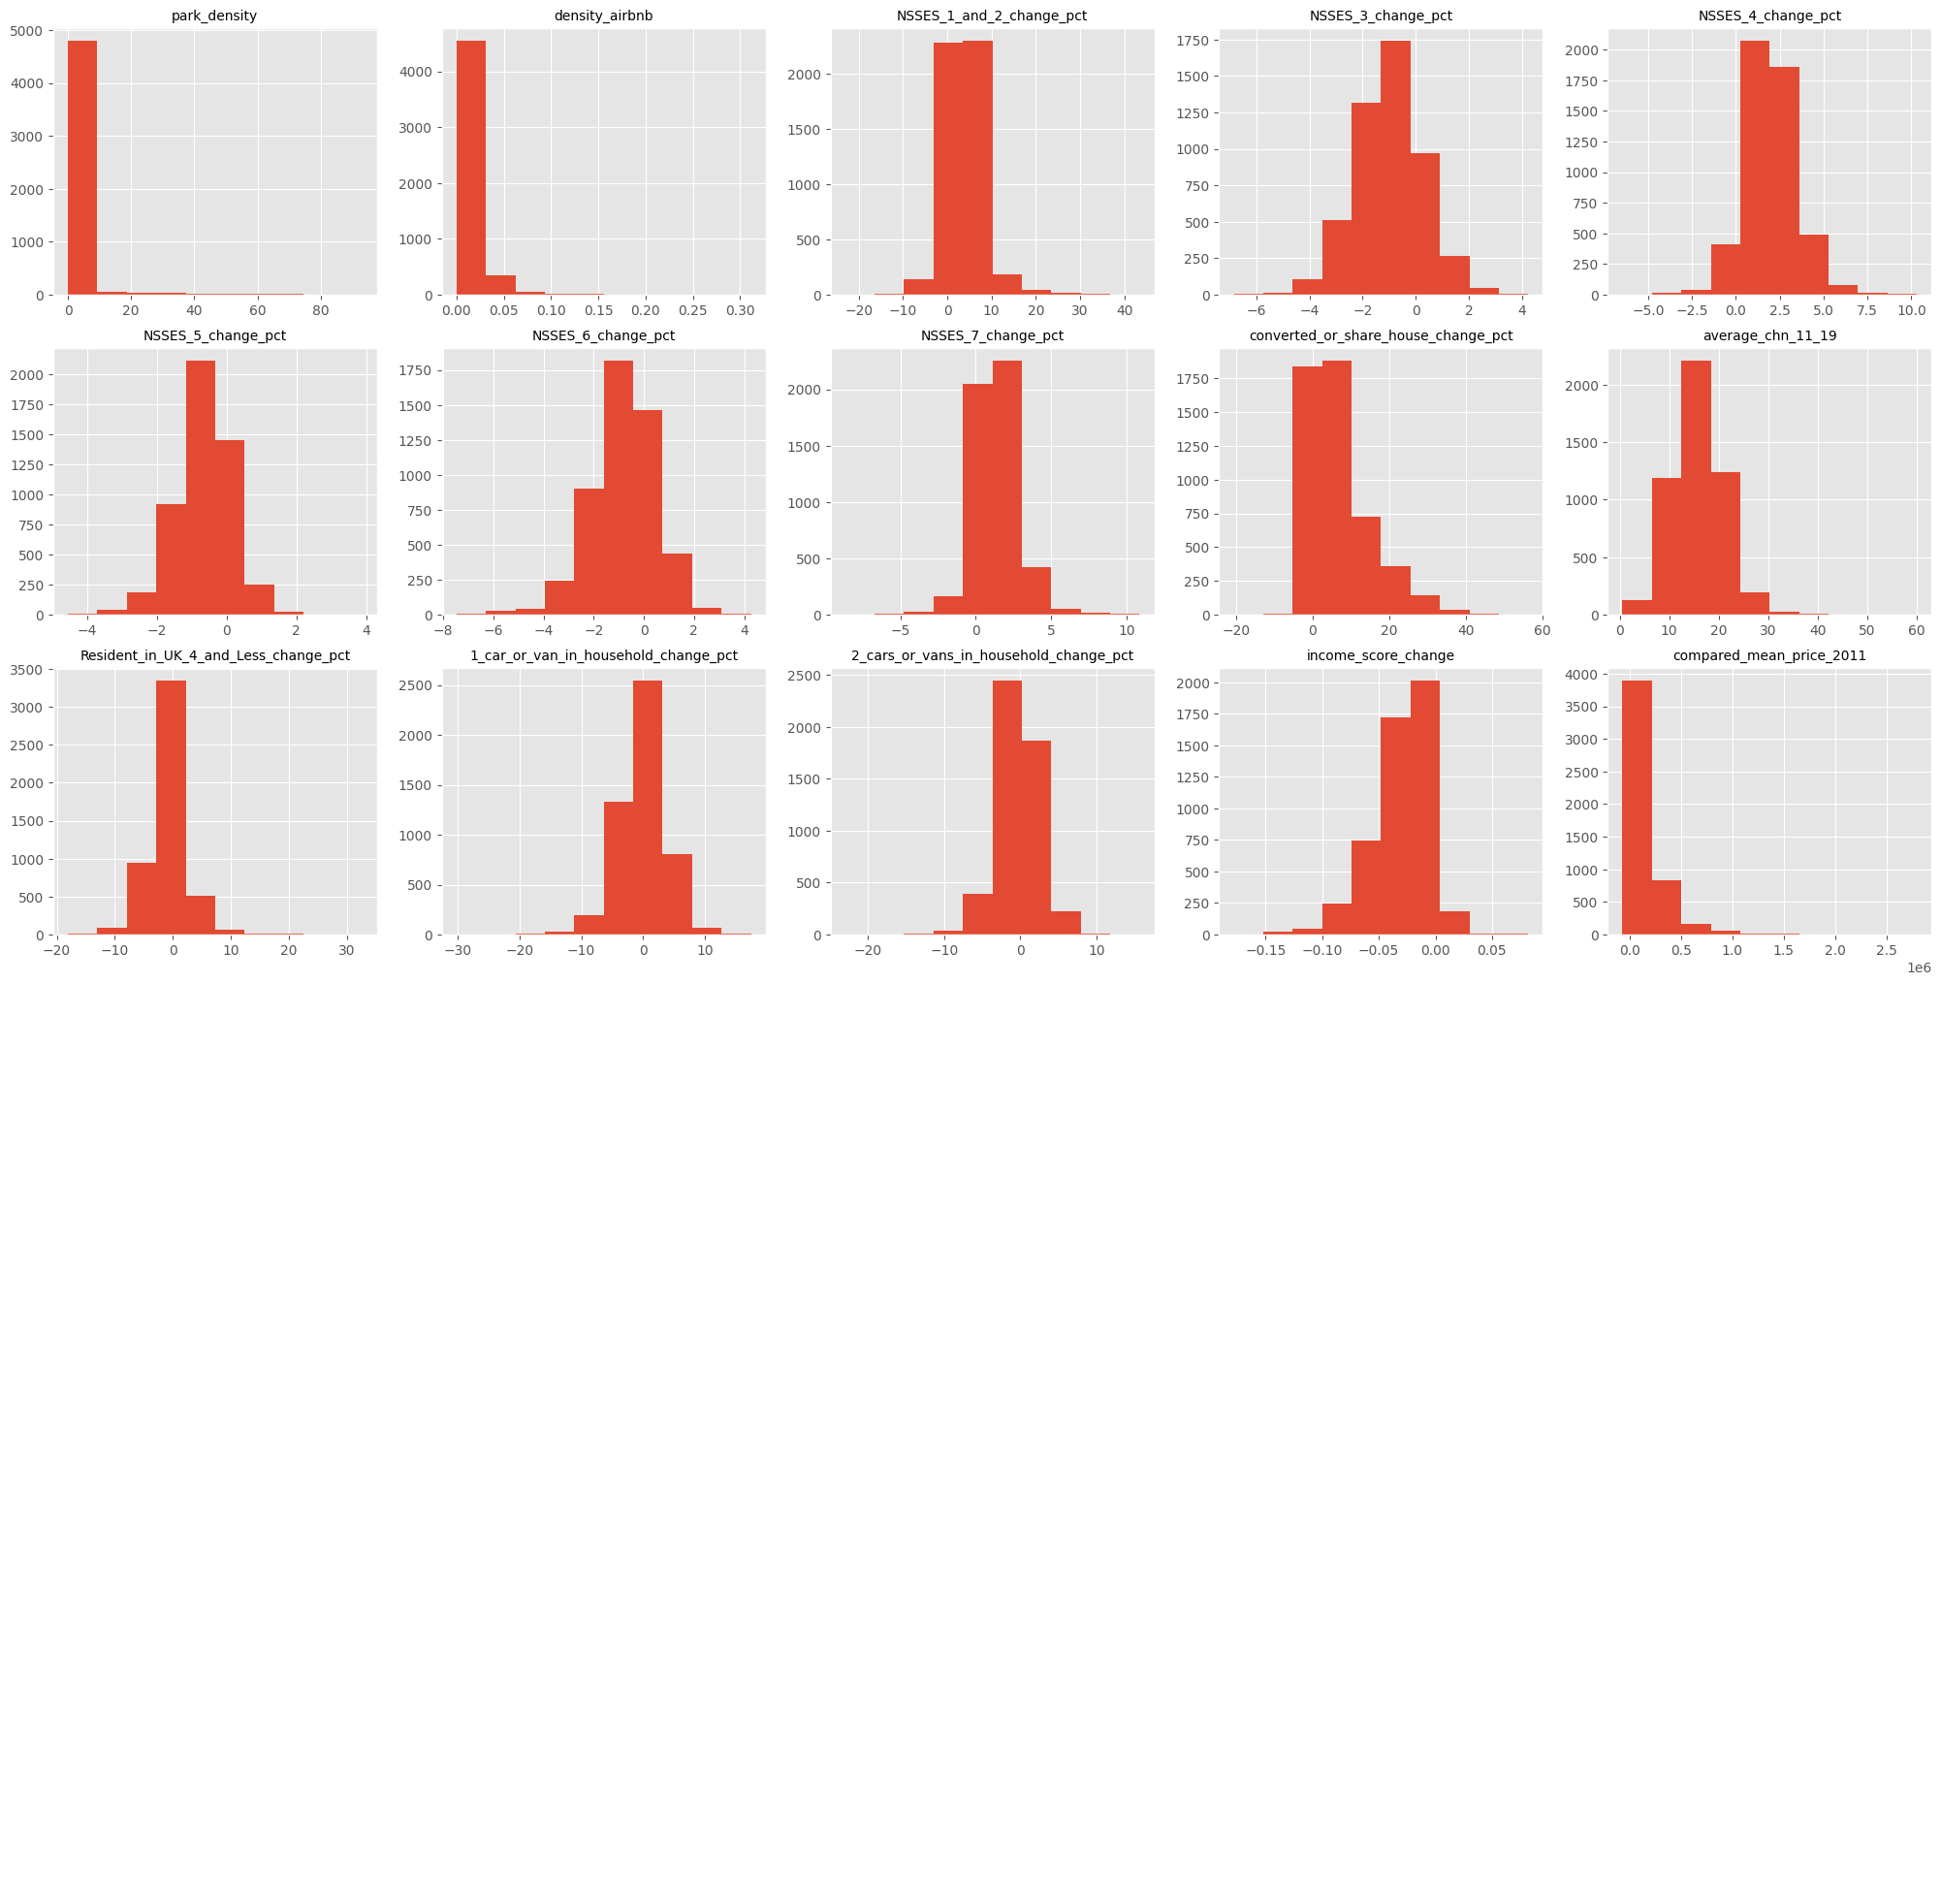

In [44]:
num_row = 6
num_col = 5
fig, axes = plt.subplots(nrows= num_row, ncols= num_col, figsize=(25, 25))

counter = 0
for i in range(num_row):
    for j in range(num_col):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len( data_for_plot.columns):

            ax.hist(data_for_plot[ data_for_plot.columns[counter]], label='{}'.format( data_for_plot.columns[counter]))
            ax.set_title( data_for_plot.columns[counter], fontsize=10)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1
        
plt.show()

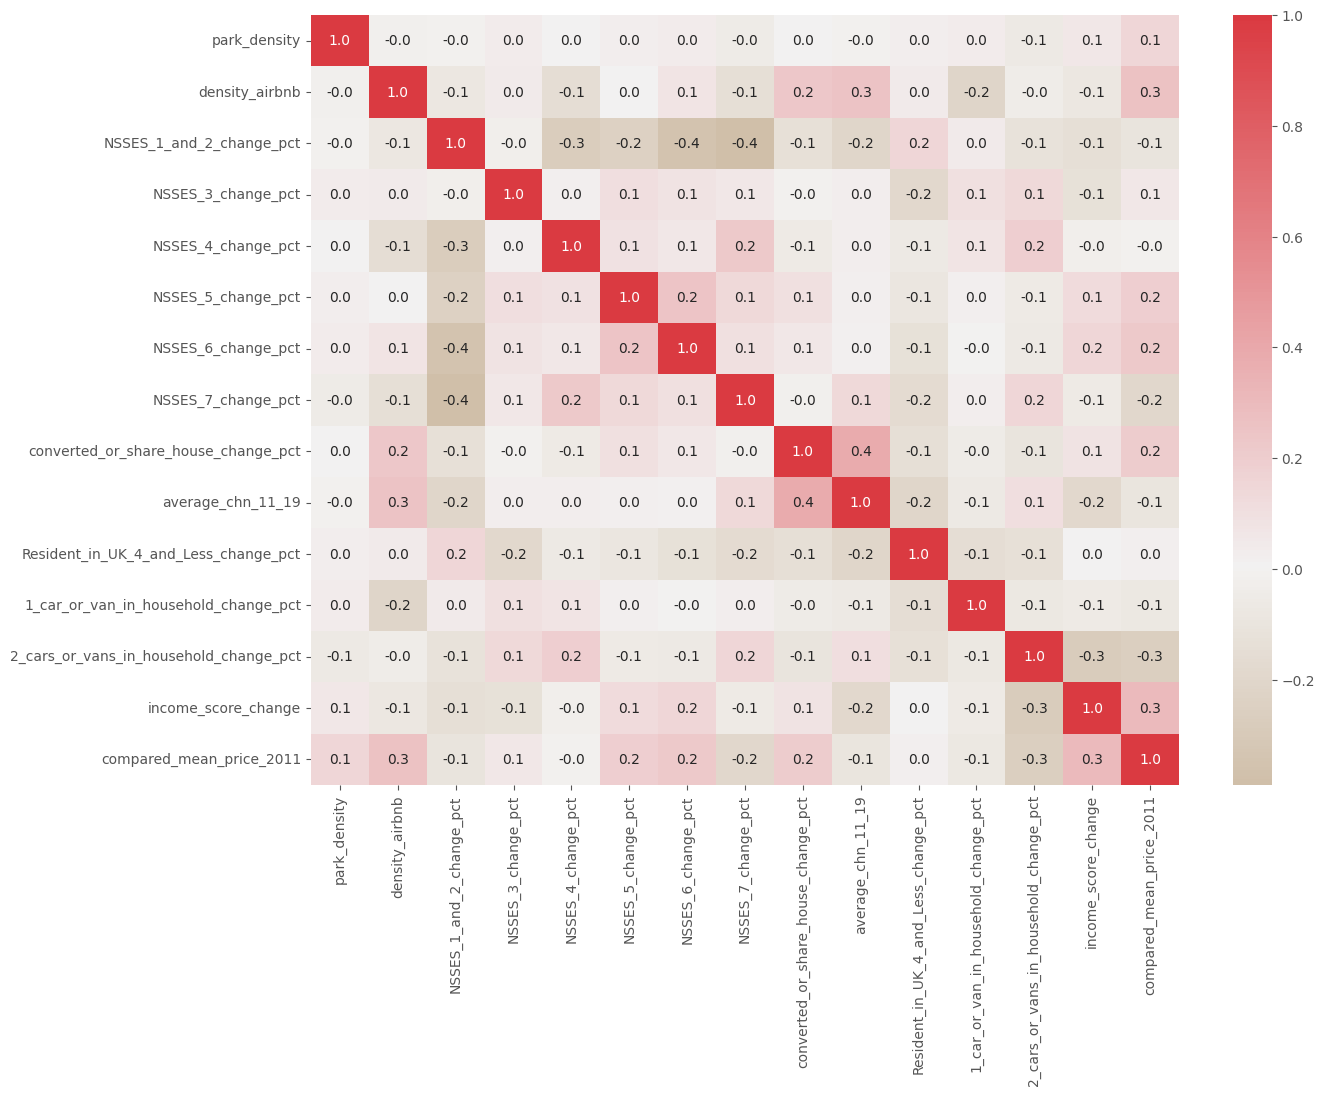

In [45]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
cmap = sns.diverging_palette(50, 11, as_cmap=True)

ax=sns.heatmap(data_for_plot.corr(), cmap=cmap, center=0, annot=True, fmt=".1f")

In [46]:
from sklearn.preprocessing import PowerTransformer

yeo_johnson_transformer = PowerTransformer(method='yeo-johnson', standardize=True)

yeo_trans = yeo_johnson_transformer.fit_transform(nor_data_psm[regression_columns])
yeo_trans_data = pd.DataFrame(yeo_trans, columns=regression_columns)

In [47]:
robust_scaler = RobustScaler()
robust_scaler = RobustScaler()
robust_data = robust_scaler.fit_transform(yeo_trans_data)
robust_data_df = pd.DataFrame(robust_data, columns=regression_columns)


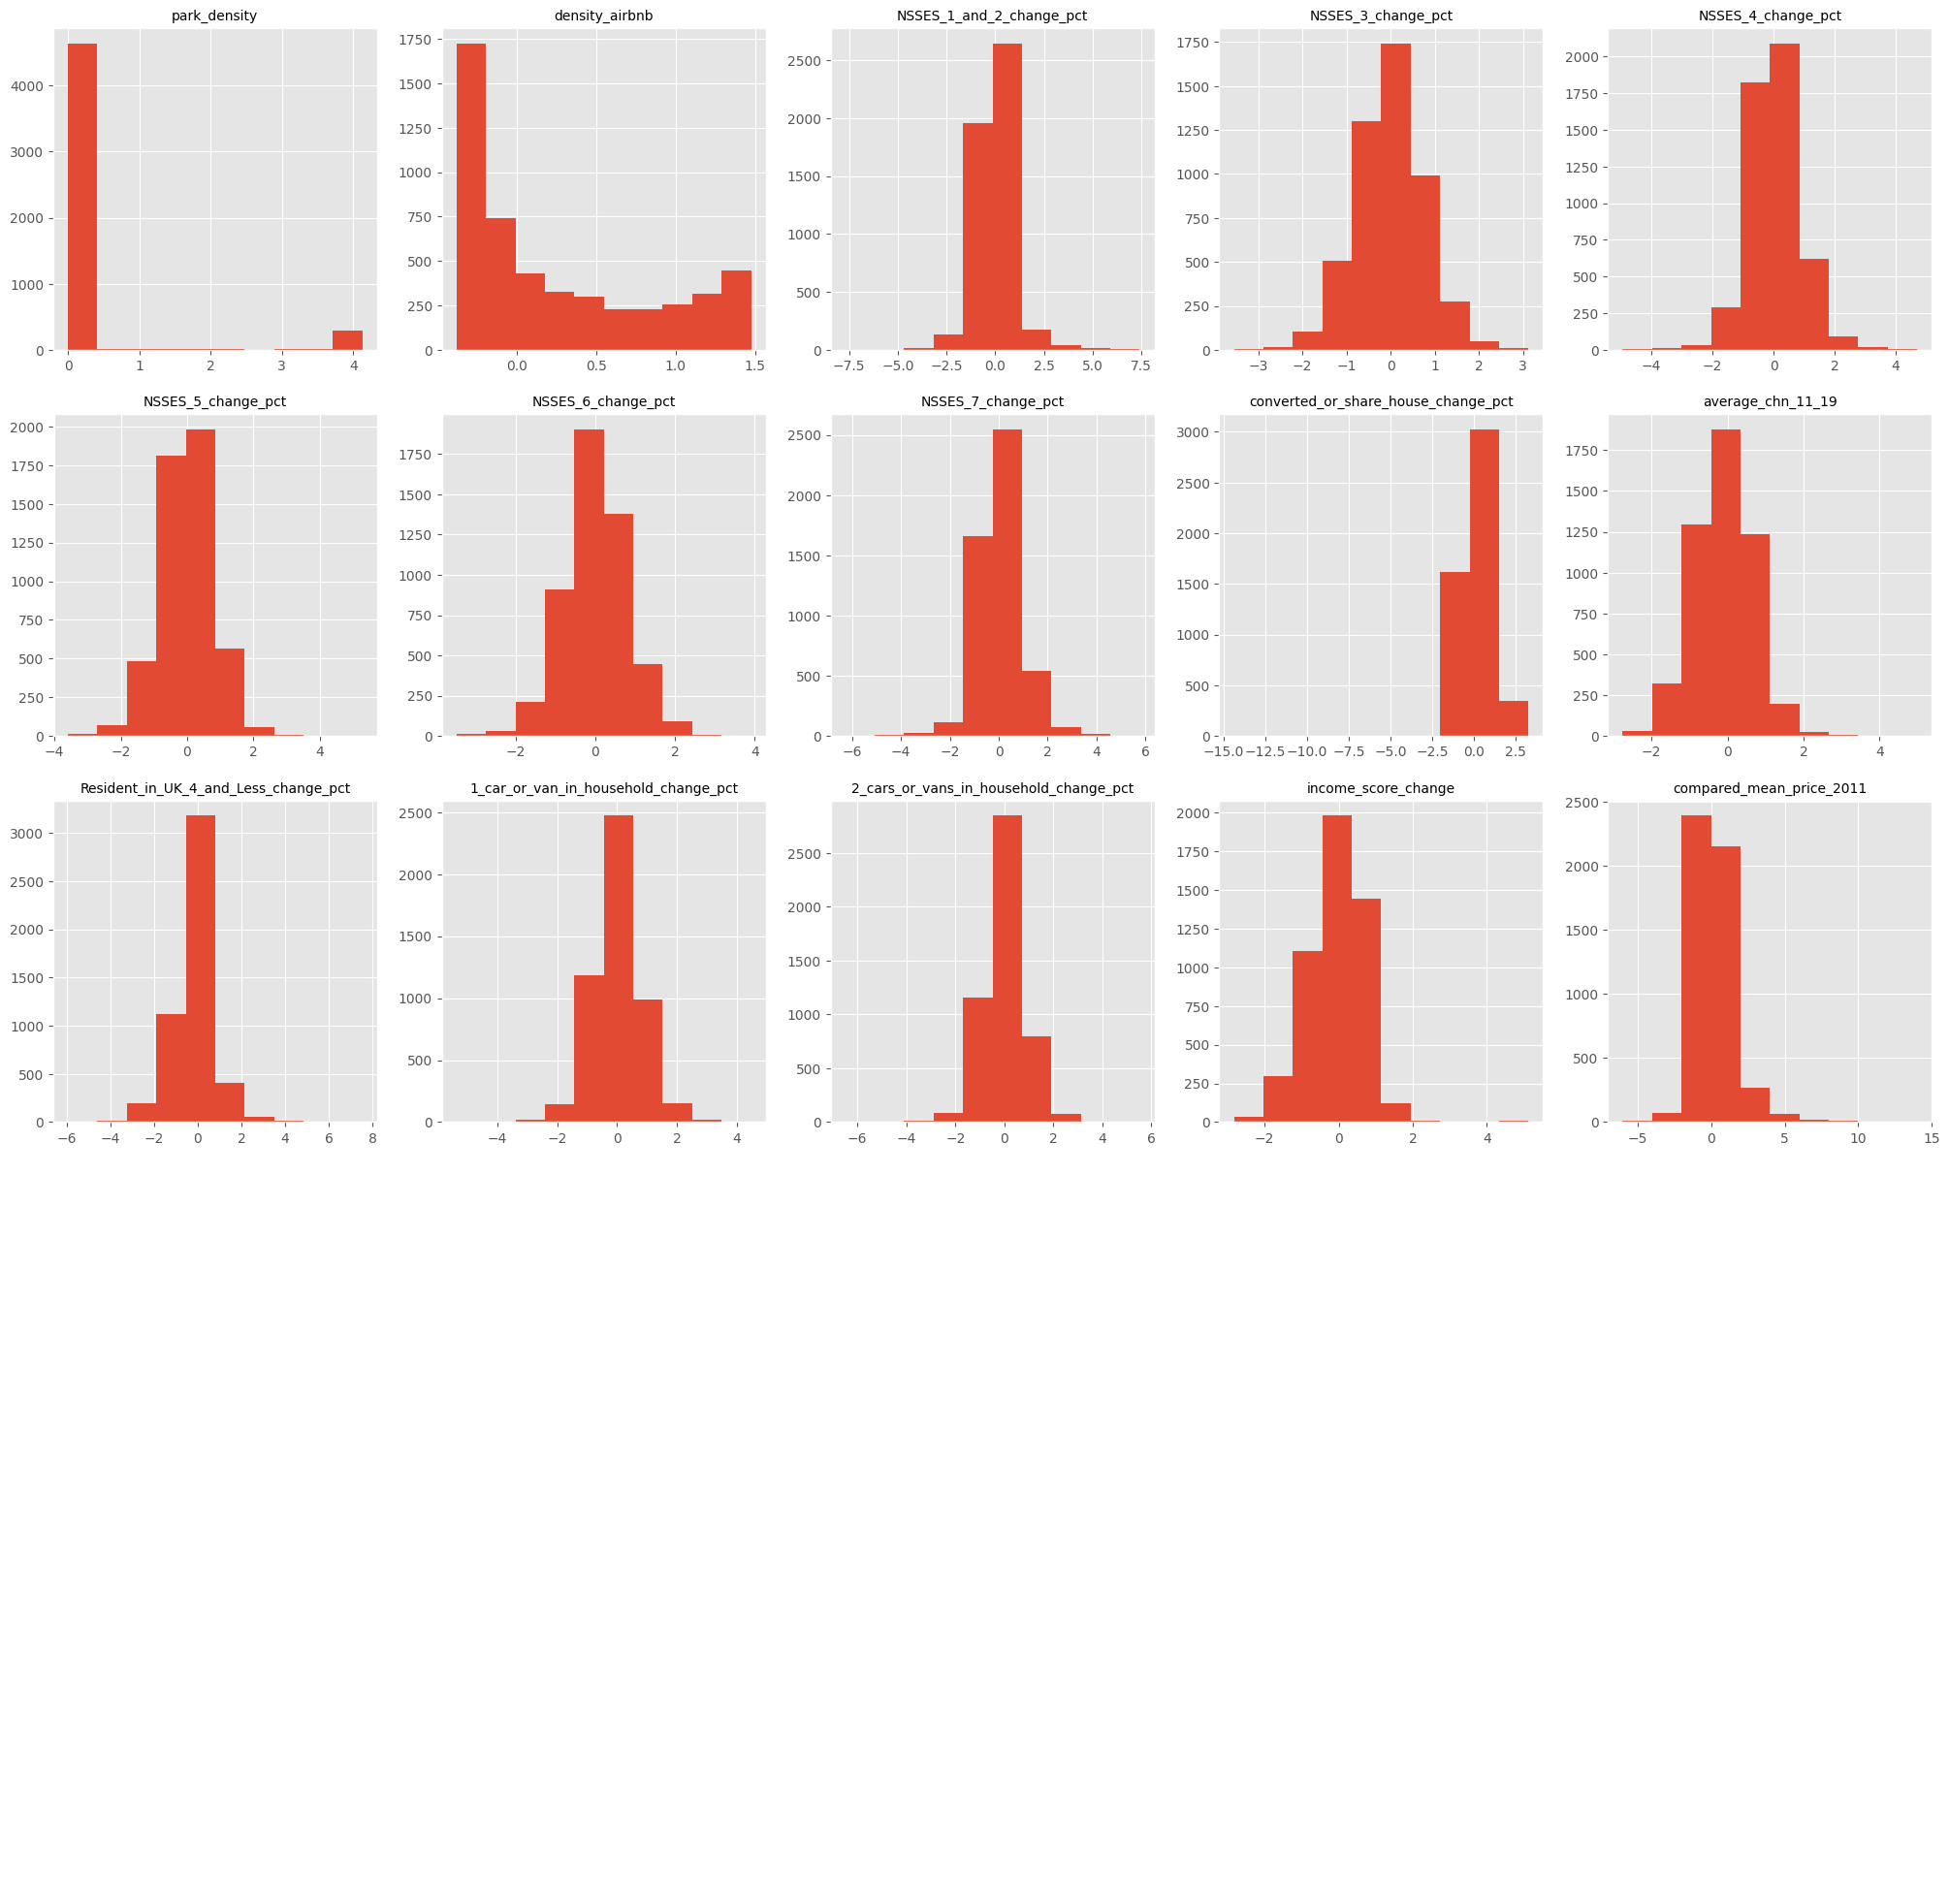

In [48]:
num_row = 5
num_col = 5
fig, axes = plt.subplots(nrows= num_row, ncols= num_col, figsize=(25, 25))

counter = 0
for i in range(num_row):
    for j in range(num_col):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len( robust_data_df.columns):

            ax.hist(robust_data_df.iloc[:, counter], label='{}'.format(robust_data_df.columns[counter]))
            ax.set_title(robust_data_df.columns[counter], fontsize=10)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1
        
plt.show()

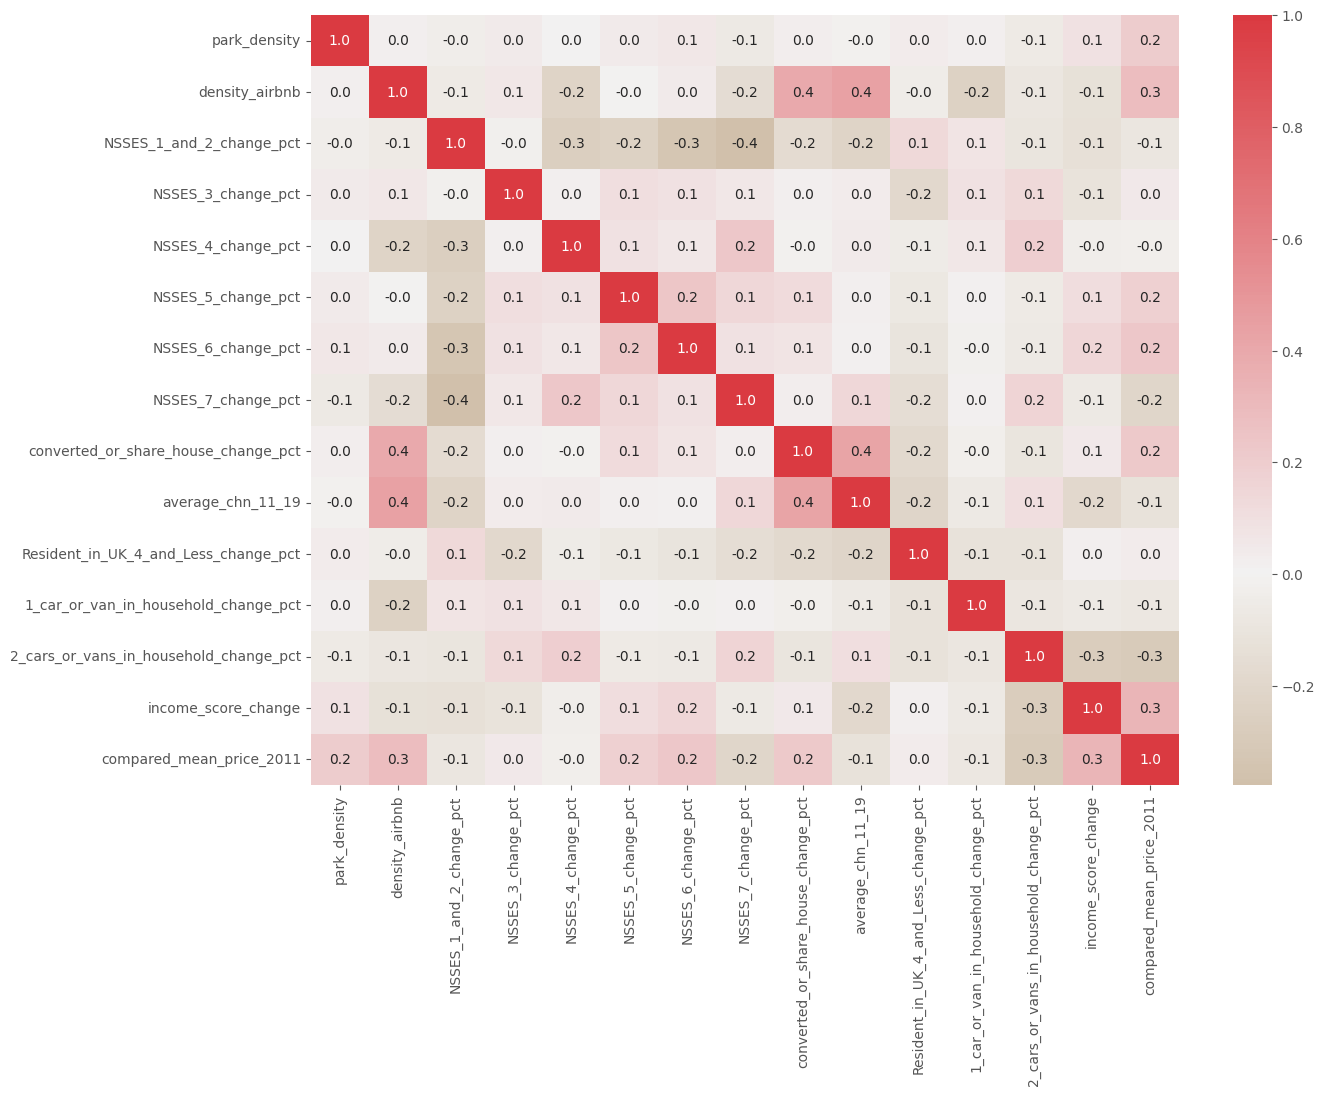

In [49]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
cmap = sns.diverging_palette(50, 11, as_cmap=True)

ax=sns.heatmap(robust_data_df.corr(), cmap=cmap, center=0, annot=True, fmt=".1f")

In [50]:
robust_data_df["s1_pca"] = nor_data_psm["s1_pca"]

In [51]:
robust_data_df

,park_density,density_airbnb,NSSES_1_and_2_change_pct,NSSES_3_change_pct,NSSES_4_change_pct,NSSES_5_change_pct,NSSES_6_change_pct,NSSES_7_change_pct,converted_or_share_house_change_pct,average_chn_11_19,Resident_in_UK_4_and_Less_change_pct,1_car_or_van_in_household_change_pct,2_cars_or_vans_in_household_change_pct,income_score_change,compared_mean_price_2011,s1_pca
0,4.127214,0.467645,-0.460429,0.487608,0.714245,0.562211,0.847720,-0.434220,-0.542273,-0.287534,1.355842,-0.750420,-0.703538,0.702332,1.509167,0.009580
1,4.127214,0.225213,0.910848,-0.506361,-0.553875,0.090178,0.142035,-0.711215,-0.329757,-0.435461,2.529593,-1.936623,-0.346465,1.747981,1.641894,0.005859
2,4.127214,1.169152,1.928039,1.034234,0.640769,-0.217968,0.024463,-0.336105,-0.412948,-0.142456,0.840153,-0.329465,0.133012,0.189127,1.029736,0.130296
3,0.000000,1.385864,-0.994607,-0.476205,-0.628463,-1.014959,-0.084893,0.855611,-0.443010,-0.435461,1.112698,-0.453667,0.082068,0.630382,-0.745667,0.360073
4,0.000000,0.113013,-1.144313,0.631900,0.753790,0.742457,0.352474,1.151436,-0.048369,1.314219,-1.182075,-0.133909,0.460876,0.287031,-0.160017,-1.343456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4989,4.127214,0.324715,-0.333862,0.649929,-0.245008,0.678432,0.457972,-0.477201,0.959951,1.190145,0.695114,-0.457638,-0.254552,0.830998,8.547649,0.072088
4990,0.000000,0.656582,-0.415764,-1.321133,-0.153754,-0.059781,-0.222103,-0.538667,-1.207516,-1.375173,2.210314,-0.939278,-0.492488,-0.091337,1.773718,-0.019953
4991,0.000000,1.112321,-2.934424,0.637910,0.431394,0.763893,1.929111,0.540900,0.157469,-1.133590,0.277252,-0.447707,0.047246,-0.091337,1.773718,-1.921162
4992,0.000000,1.058537,0.232651,0.042169,-0.319235,-1.230099,-0.180623,-0.797774,-0.352344,1.558431,0.758970,-0.965756,-0.325067,0.387241,1.324843,0.021986


In [52]:
robust_data_df_export = robust_data_df.copy()

In [53]:
robust_data_df_export["LSOA21CD"] = nor_data_psm["LSOA21CD"]

In [54]:
robust_data_df_export

,park_density,density_airbnb,NSSES_1_and_2_change_pct,NSSES_3_change_pct,NSSES_4_change_pct,NSSES_5_change_pct,NSSES_6_change_pct,NSSES_7_change_pct,converted_or_share_house_change_pct,average_chn_11_19,Resident_in_UK_4_and_Less_change_pct,1_car_or_van_in_household_change_pct,2_cars_or_vans_in_household_change_pct,income_score_change,compared_mean_price_2011,s1_pca,LSOA21CD
0,4.127214,0.467645,-0.460429,0.487608,0.714245,0.562211,0.847720,-0.434220,-0.542273,-0.287534,1.355842,-0.750420,-0.703538,0.702332,1.509167,0.009580,E01000001
1,4.127214,0.225213,0.910848,-0.506361,-0.553875,0.090178,0.142035,-0.711215,-0.329757,-0.435461,2.529593,-1.936623,-0.346465,1.747981,1.641894,0.005859,E01000002
2,4.127214,1.169152,1.928039,1.034234,0.640769,-0.217968,0.024463,-0.336105,-0.412948,-0.142456,0.840153,-0.329465,0.133012,0.189127,1.029736,0.130296,E01000003
3,0.000000,1.385864,-0.994607,-0.476205,-0.628463,-1.014959,-0.084893,0.855611,-0.443010,-0.435461,1.112698,-0.453667,0.082068,0.630382,-0.745667,0.360073,E01000005
4,0.000000,0.113013,-1.144313,0.631900,0.753790,0.742457,0.352474,1.151436,-0.048369,1.314219,-1.182075,-0.133909,0.460876,0.287031,-0.160017,-1.343456,E01000006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4989,4.127214,0.324715,-0.333862,0.649929,-0.245008,0.678432,0.457972,-0.477201,0.959951,1.190145,0.695114,-0.457638,-0.254552,0.830998,8.547649,0.072088,E01035718
4990,0.000000,0.656582,-0.415764,-1.321133,-0.153754,-0.059781,-0.222103,-0.538667,-1.207516,-1.375173,2.210314,-0.939278,-0.492488,-0.091337,1.773718,-0.019953,E01035719
4991,0.000000,1.112321,-2.934424,0.637910,0.431394,0.763893,1.929111,0.540900,0.157469,-1.133590,0.277252,-0.447707,0.047246,-0.091337,1.773718,-1.921162,E01035720
4992,0.000000,1.058537,0.232651,0.042169,-0.319235,-1.230099,-0.180623,-0.797774,-0.352344,1.558431,0.758970,-0.965756,-0.325067,0.387241,1.324843,0.021986,E01035721


In [57]:
covariates = robust_data_df.iloc[:, :-1]
covariates

,park_density,density_airbnb,NSSES_1_and_2_change_pct,NSSES_3_change_pct,NSSES_4_change_pct,NSSES_5_change_pct,NSSES_6_change_pct,NSSES_7_change_pct,converted_or_share_house_change_pct,average_chn_11_19,Resident_in_UK_4_and_Less_change_pct,1_car_or_van_in_household_change_pct,2_cars_or_vans_in_household_change_pct,income_score_change,compared_mean_price_2011
0,4.127214,0.467645,-0.460429,0.487608,0.714245,0.562211,0.847720,-0.434220,-0.542273,-0.287534,1.355842,-0.750420,-0.703538,0.702332,1.509167
1,4.127214,0.225213,0.910848,-0.506361,-0.553875,0.090178,0.142035,-0.711215,-0.329757,-0.435461,2.529593,-1.936623,-0.346465,1.747981,1.641894
2,4.127214,1.169152,1.928039,1.034234,0.640769,-0.217968,0.024463,-0.336105,-0.412948,-0.142456,0.840153,-0.329465,0.133012,0.189127,1.029736
3,0.000000,1.385864,-0.994607,-0.476205,-0.628463,-1.014959,-0.084893,0.855611,-0.443010,-0.435461,1.112698,-0.453667,0.082068,0.630382,-0.745667
4,0.000000,0.113013,-1.144313,0.631900,0.753790,0.742457,0.352474,1.151436,-0.048369,1.314219,-1.182075,-0.133909,0.460876,0.287031,-0.160017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4989,4.127214,0.324715,-0.333862,0.649929,-0.245008,0.678432,0.457972,-0.477201,0.959951,1.190145,0.695114,-0.457638,-0.254552,0.830998,8.547649
4990,0.000000,0.656582,-0.415764,-1.321133,-0.153754,-0.059781,-0.222103,-0.538667,-1.207516,-1.375173,2.210314,-0.939278,-0.492488,-0.091337,1.773718
4991,0.000000,1.112321,-2.934424,0.637910,0.431394,0.763893,1.929111,0.540900,0.157469,-1.133590,0.277252,-0.447707,0.047246,-0.091337,1.773718
4992,0.000000,1.058537,0.232651,0.042169,-0.319235,-1.230099,-0.180623,-0.797774,-0.352344,1.558431,0.758970,-0.965756,-0.325067,0.387241,1.324843


In [58]:
import statsmodels.api as sm

def ols_regression_analysis(covariate_data, target_data):
    # Add constant term to covariate_data for intercept
    X = sm.add_constant(covariate_data)
    
    # Fit the OLS regression model
    ols_model = sm.OLS(target_data, X)
    result = ols_model.fit()
    
    # Return the summary
    return result.summary()

# Assuming covariates is your X data
summary = ols_regression_analysis(covariates, robust_data_df['s1_pca'])
print(summary)


                            OLS Regression Results                            
Dep. Variable:                 s1_pca   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     263.3
Date:                Mon, 21 Aug 2023   Prob (F-statistic):               0.00
Time:                        13:11:50   Log-Likelihood:                -2273.8
No. Observations:                4994   AIC:                             4580.
Df Residuals:                    4978   BIC:                             4684.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [60]:
import statsmodels.api as sm
import pandas as pd

def ols_regression_analysis(covariate_data, target_data):
    # Add constant term to covariate_data for intercept
    X = sm.add_constant(covariate_data)
    
    # Fit the OLS regression model
    ols_model = sm.OLS(target_data, X)
    result = ols_model.fit()
    
    # Return the result object for further analysis
    return result

# Assuming covariates is your X data
result = ols_regression_analysis(covariates, robust_data_df['s1_pca'])

# Print the summary
print(result.summary())

# Get the residuals
residuals = result.resid

# Convert residuals to a DataFrame
residuals_df = pd.DataFrame({'Residuals': residuals})

# Optionally, if you have a specific index (like region names), you can set it:
# residuals_df.index = list_of_region_names

# Print the residuals DataFrame
print(residuals_df)


                            OLS Regression Results                            
Dep. Variable:                 s1_pca   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     263.3
Date:                Mon, 21 Aug 2023   Prob (F-statistic):               0.00
Time:                        13:11:53   Log-Likelihood:                -2273.8
No. Observations:                4994   AIC:                             4580.
Df Residuals:                    4978   BIC:                             4684.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

residuals_df

In [61]:
residuals_df["LSOA21CD"] = nor_data_psm["LSOA21CD"]

In [63]:
residuals_df.to_csv('data/residuals_df.csv')